In [1]:
#enagle autocomplete with tab
#%config Completer.use_jedi = False

import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import scipy

sns.set_theme(style="whitegrid")

In [2]:
snp = pd.read_csv('../DATA/SPX.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
nkx = pd.read_csv('../DATA/NKX.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
dax = pd.read_csv('../DATA/DAX.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
wig = pd.read_csv('../DATA/WIG.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
wig20 = pd.read_csv('../DATA/WIG20.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
kospi = pd.read_csv('../DATA/KOSPI.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
bvp = pd.read_csv('../DATA/BVP.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
mrv = pd.read_csv('../DATA/MRV.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )

#połączyć to w jeden df!!
cols = [snp['Close'], nkx['Close'], dax['Close'], wig['Close'], wig20['Close'], kospi['Close'], bvp['Close'], mrv['Close']]
dt = pd.concat(cols, axis=1)

In [3]:
dt #powstają na

,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,
2000-01-03,1455.22,NaN,6750.76,18981.70,1852.90,NaN,16930.0,551.83
2000-01-04,1399.42,19002.86,6586.95,18558.00,1796.60,1059.04,15851.0,522.97
2000-01-05,1402.11,18542.55,6502.07,17694.40,1777.00,986.31,16245.0,532.68
2000-01-06,1403.45,18168.27,6474.92,18074.70,1832.10,960.79,16107.0,528.47
2000-01-07,1441.47,18193.41,6780.96,18953.50,1933.20,948.65,16309.0,522.12
...,...,...,...,...,...,...,...,...
2020-12-25,NaN,26656.61,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,3735.36,26854.03,13790.29,57172.46,2004.41,NaN,119123.7,50483.84
2020-12-29,3727.04,27568.15,13761.38,57701.40,2016.01,NaN,119409.2,51320.14


<AxesSubplot:xlabel='Date'>

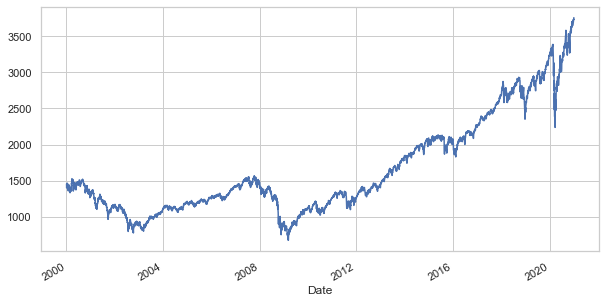

In [4]:
snp['Close'].plot(figsize=(10,5))

[Text(0.5, 1.0, 'BOVESPA'),
 Text(0.5, 30.50000000000005, 'Data'),
 Text(600.0470588235295, 0.5, 'Cena')]

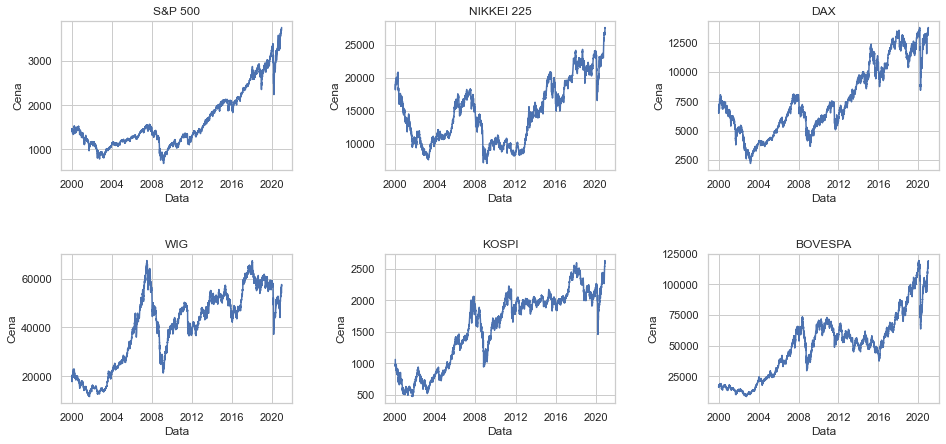

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(13, 6))
fig.tight_layout(h_pad=5, w_pad=5)
#fig.suptitle('Indices Price')

sns.lineplot(ax=axes[0, 0], data=snp['Close'])
axes[0,0].set(title='S&P 500', xlabel='Data', ylabel='Cena')
sns.lineplot(ax=axes[0, 1], data=nkx['Close'])
axes[0,1].set(title='NIKKEI 225', xlabel='Data', ylabel='Cena')
sns.lineplot(ax=axes[0, 2], data=dax['Close'])
axes[0,2].set(title='DAX', xlabel='Data', ylabel='Cena')
sns.lineplot(ax=axes[1, 0], data=wig['Close'])
axes[1,0].set(title='WIG', xlabel='Data', ylabel='Cena')
# sns.lineplot(ax=axes[1, 0], data=wig20['Close'])
# axes[1,0].set_title('WIG20')
sns.lineplot(ax=axes[1, 1], data=kospi['Close'])
axes[1,1].set(title='KOSPI', xlabel='Data', ylabel='Cena')
sns.lineplot(ax=axes[1, 2], data=bvp['Close'])
axes[1,2].set(title='BOVESPA', xlabel='Data', ylabel='Cena')
# sns.lineplot(ax=axes[1, 3], data=mrv['Close'])
# axes[1,3].set_title('MERVAL')


In [4]:
# snp_ret = snp["Close"].pct_change().dropna()
# nkx_ret = nkx["Close"].pct_change().dropna()
# dax_ret = dax["Close"].pct_change().dropna()
# wig_ret = wig["Close"].pct_change().dropna()
# wig20_ret = wig20["Close"].pct_change().dropna()
# kospi_ret = kospi["Close"].pct_change().dropna()
# bvp_ret = bvp["Close"].pct_change().dropna()
# mrv_ret = mrv["Close"].pct_change().dropna()


snp_ret = pd.Series(np.diff(np.log(snp["Close"])*100), index=snp.index[1:])
nkx_ret = pd.Series(np.diff(np.log(nkx["Close"])*100), index=nkx.index[1:])
dax_ret = pd.Series(np.diff(np.log(dax["Close"])*100), index=dax.index[1:])
wig_ret = pd.Series(np.diff(np.log(wig["Close"])*100), index=wig.index[1:])
wig20_ret = pd.Series(np.diff(np.log(wig20["Close"])*100), index=wig20.index[1:])
kospi_ret = pd.Series(np.diff(np.log(kospi["Close"])*100), index=kospi.index[1:])
bvp_ret = pd.Series(np.diff(np.log(bvp["Close"])*100), index=bvp.index[1:])
mrv_ret = pd.Series(np.diff(np.log(mrv["Close"])*100), index=mrv.index[1:])


In [11]:
type(snp_ret)

pandas.core.series.Series

In [46]:
snp_ret

Date
2000-01-04   -0.039099
2000-01-05    0.001920
2000-01-06    0.000955
2000-01-07    0.026730
2000-01-10    0.011128
                ...   
2020-12-24    0.003530
2020-12-28    0.008685
2020-12-29   -0.002230
2020-12-30    0.001341
2020-12-31    0.006418
Length: 5283, dtype: float64

<AxesSubplot:xlabel='Date'>

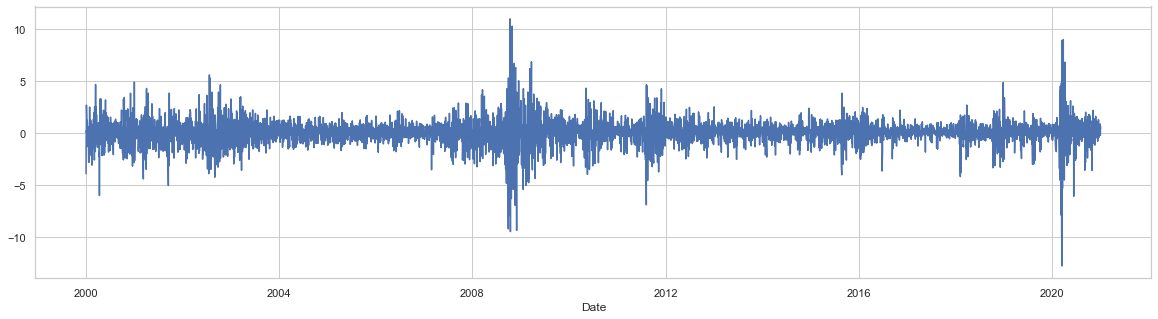

In [16]:
plt.figure(figsize=(20,5))
sns.lineplot(data=snp_ret)

[Text(0.5, 1.0, 'BOVESPA'),
 Text(0.5, 30.50000000000005, 'Data'),
 Text(600.0470588235295, 0.5, 'Stopa zwrotu')]

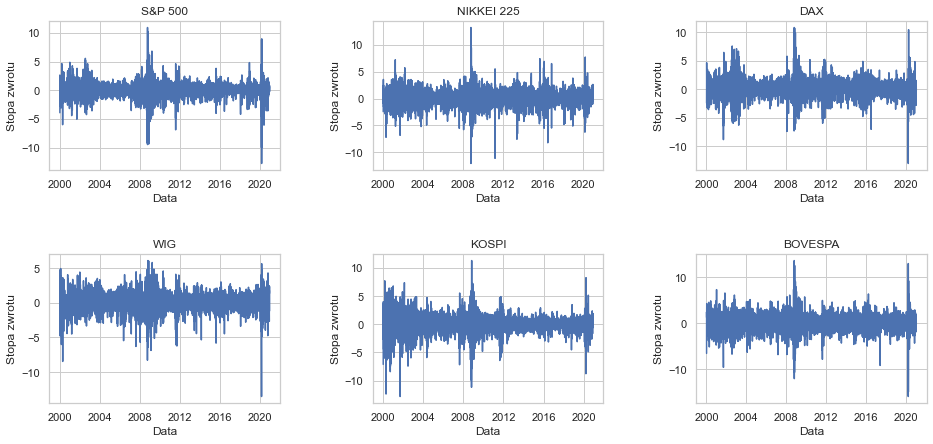

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(13, 6))
fig.tight_layout(h_pad=5, w_pad=5)
#fig.suptitle('Indices Returns')

sns.lineplot(ax=axes[0, 0], data=snp_ret)
axes[0,0].set(title='S&P 500', xlabel='Data', ylabel='Stopa zwrotu')
sns.lineplot(ax=axes[0, 1], data=nkx_ret)
axes[0,1].set(title='NIKKEI 225', xlabel='Data', ylabel='Stopa zwrotu')
sns.lineplot(ax=axes[0, 2], data=dax_ret)
axes[0,2].set(title='DAX', xlabel='Data', ylabel='Stopa zwrotu')
sns.lineplot(ax=axes[1, 0], data=wig_ret)
axes[1,0].set(title='WIG', xlabel='Data', ylabel='Stopa zwrotu')
# sns.lineplot(ax=axes[1, 0], data=wig20_ret)
# axes[1,0].set_title('WIG20')
sns.lineplot(ax=axes[1, 1], data=kospi_ret)
axes[1,1].set(title='KOSPI', xlabel='Data', ylabel='Stopa zwrotu')
sns.lineplot(ax=axes[1, 2], data=bvp_ret)
axes[1,2].set(title='BOVESPA', xlabel='Data', ylabel='Stopa zwrotu')
# sns.lineplot(ax=axes[1, 3], data=mrv_ret)
# axes[1,3].set_title('MERVAL')

In [6]:
snp_ret_sq = np.square(snp_ret)
nkx_ret_sq = np.square(nkx_ret)
dax_ret_sq = np.square(dax_ret)
wig_ret_sq = np.square(wig_ret)
wig20_ret_sq = np.square(wig20_ret)
kospi_ret_sq = np.square(kospi_ret)
bvp_ret_sq = np.square(bvp_ret)
mrv_ret_sq = np.square(mrv_ret)

<AxesSubplot:xlabel='Date'>

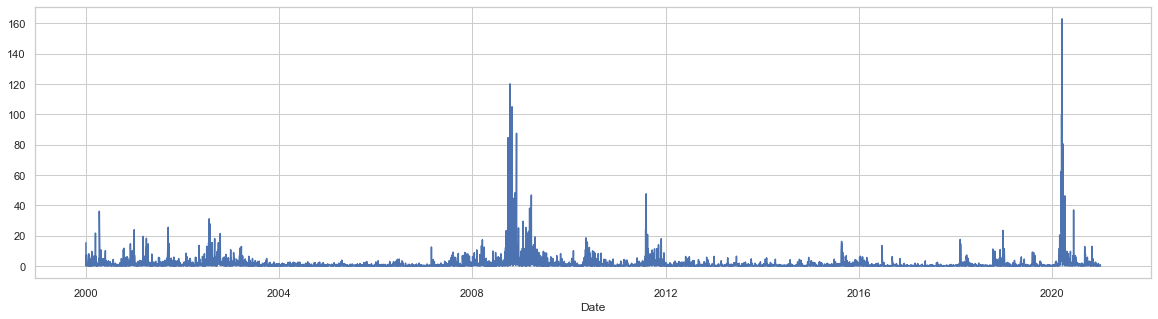

In [19]:
plt.figure(figsize=(20,5))
sns.lineplot(data=snp_ret_sq)

[Text(0.5, 1.0, 'BOVESPA'),
 Text(0.5, 30.50000000000005, 'Data'),
 Text(600.0470588235295, 0.5, 'Kwadrat zwrotu')]

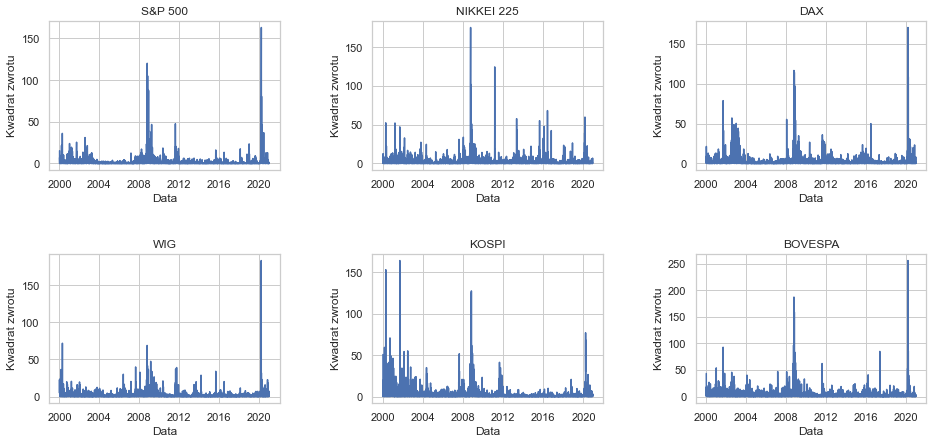

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(13, 6))
fig.tight_layout(h_pad=5, w_pad=5)
#fig.suptitle('Indices Squared Returns')

sns.lineplot(ax=axes[0, 0], data=snp_ret_sq)
axes[0,0].set(title='S&P 500', xlabel='Data', ylabel='Kwadrat zwrotu')
sns.lineplot(ax=axes[0, 1], data=nkx_ret_sq)
axes[0,1].set(title='NIKKEI 225', xlabel='Data', ylabel='Kwadrat zwrotu')
sns.lineplot(ax=axes[0, 2], data=dax_ret_sq)
axes[0,2].set(title='DAX', xlabel='Data', ylabel='Kwadrat zwrotu')
sns.lineplot(ax=axes[1, 0], data=wig_ret_sq)
axes[1,0].set(title='WIG', xlabel='Data', ylabel='Kwadrat zwrotu')
# sns.lineplot(ax=axes[1, 0], data=wig20_ret_sq)
# axes[1,0].set_title('WIG20')
sns.lineplot(ax=axes[1, 1], data=kospi_ret_sq)
axes[1,1].set(title='KOSPI', xlabel='Data', ylabel='Kwadrat zwrotu')
sns.lineplot(ax=axes[1, 2], data=bvp_ret_sq)
axes[1,2].set(title='BOVESPA', xlabel='Data', ylabel='Kwadrat zwrotu')
# sns.lineplot(ax=axes[1, 3], data=mrv_ret_sq)
# axes[1,3].set_title('MERVAL')

In [ ]:
sns.displot(snp_ret, kind="kde", height=7, aspect=2)
sns.displot(snp_ret, kind="hist", height=7, aspect=2)

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(28, 10)) #tu może dać histogramy dyskretne plus uciąglone plus rozkład normalny o średniej arytmetycznej i wariancji z próby
fig.tight_layout(h_pad=5, w_pad=5)
fig.suptitle('Indices Returns Density')

sns.kdeplot(snp_ret, ax=axes[0, 0])
axes[0,0].set_title('S&P 500')
sns.kdeplot(nkx_ret, ax=axes[0, 1])
axes[0,1].set_title('Nikkei 225')
sns.kdeplot(dax_ret, ax=axes[0, 2])
axes[0,2].set_title('DAX')
sns.kdeplot(wig_ret, ax=axes[0, 3])
axes[0,3].set_title('WIG')
sns.kdeplot(wig20_ret, ax=axes[1, 0])
axes[1,0].set_title('WIG20')
sns.kdeplot(kospi_ret, ax=axes[1, 1])
axes[1,1].set_title('KOSPI')
sns.kdeplot(bvp_ret, ax=axes[1, 2])
axes[1,2].set_title('BOVESPA')
sns.kdeplot(mrv_ret, ax=axes[1, 3])
axes[1,3].set_title('MERVAL')

c:\Users\et\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\et\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\et\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

[Text(0.5, 1.0, 'BOVESPA'), Text(0.5, 30.50000000000005, 'Stopa zwrotu')]

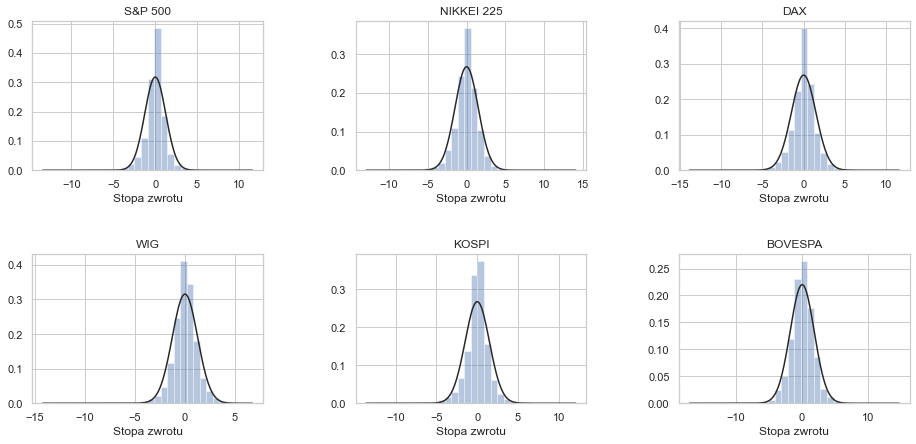

In [9]:
# fig, axes = plt.subplots(2, 4, figsize=(28, 10)) #tu może dać histogramy dyskretne plus uciąglone plus rozkład normalny o średniej arytmetycznej i wariancji z próby
# fig.tight_layout(h_pad=5, w_pad=5)
# fig.suptitle('Indices Returns Density')

# sns.histplot(snp_ret, ax=axes[0, 0], bins=30)
# axes[0,0].set_title('S&P 500')
# sns.histplot(nkx_ret, ax=axes[0, 1])
# axes[0,1].set_title('Nikkei 225')
# sns.histplot(dax_ret, ax=axes[0, 2])
# axes[0,2].set_title('DAX')
# sns.histplot(wig_ret, ax=axes[0, 3])
# axes[0,3].set_title('WIG')
# sns.histplot(wig20_ret, ax=axes[1, 0])
# axes[1,0].set_title('WIG20')
# sns.histplot(kospi_ret, ax=axes[1, 1])
# axes[1,1].set_title('KOSPI')
# sns.histplot(bvp_ret, ax=axes[1, 2])
# axes[1,2].set_title('BOVESPA')
# sns.histplot(mrv_ret, ax=axes[1, 3])
# axes[1,3].set_title('MERVAL')


fig, axes = plt.subplots(2, 3, figsize=(13, 6)) #tu może dać histogramy dyskretne plus uciąglone plus rozkład normalny o średniej arytmetycznej i wariancji z próby
fig.tight_layout(h_pad=5, w_pad=5)


sns.distplot(snp_ret, ax=axes[0,0], bins=30, fit=scipy.stats.norm, kde=False, hist=True, color="b")
axes[0,0].set(title='S&P 500', xlabel='Stopa zwrotu')
sns.distplot(nkx_ret, ax=axes[0,1], bins=30, fit=scipy.stats.norm, kde=False, hist=True)
axes[0,1].set(title='NIKKEI 225', xlabel='Stopa zwrotu')
sns.distplot(dax_ret, ax=axes[0,2], bins=30, fit=scipy.stats.norm, kde=False, hist=True)
axes[0,2].set(title='DAX', xlabel='Stopa zwrotu')
sns.distplot(wig_ret, ax=axes[1,0], bins=30, fit=scipy.stats.norm, kde=False, hist=True, color="b")
axes[1,0].set(title='WIG', xlabel='Stopa zwrotu')
sns.distplot(kospi_ret, ax=axes[1,1], bins=30, fit=scipy.stats.norm, kde=False, hist=True)
axes[1,1].set(title='KOSPI', xlabel='Stopa zwrotu')
sns.distplot(bvp_ret, ax=axes[1,2], bins=30, fit=scipy.stats.norm, kde=False, hist=True)
axes[1,2].set(title='BOVESPA', xlabel='Stopa zwrotu')

<AxesSubplot:>

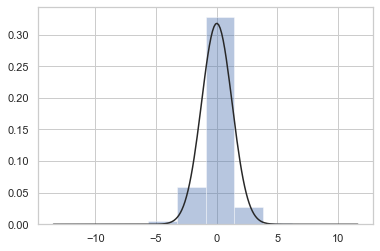

In [108]:
sns.distplot(snp_ret, bins=10, fit=scipy.stats.norm, kde=False, hist=True, color="b")

In [21]:
######
##distplot narysuje chyba histogram z nałożonym rozkładem normalnym (albo rozkładem wogole)

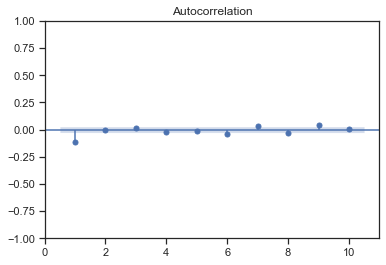

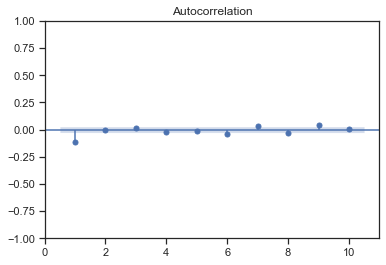

In [64]:
plot_acf(snp_ret, lags=10, zero=False)
#plot_pacf(snp_ret, lags=10)

(-0.13, 0.13)

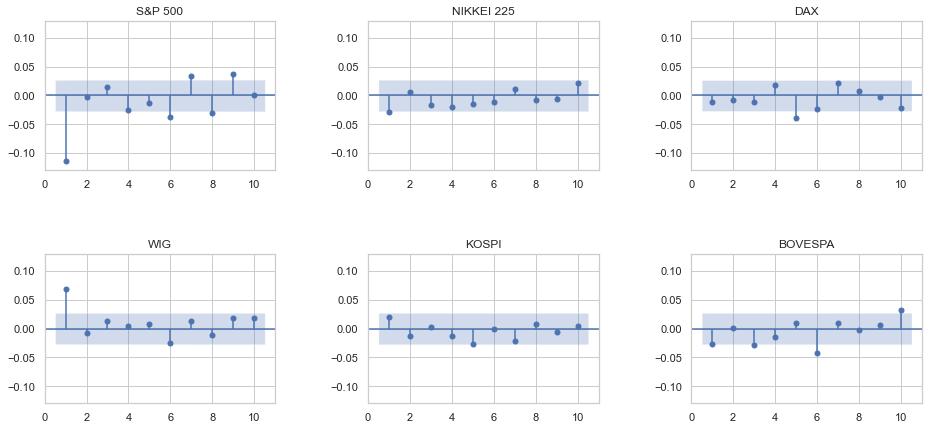

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(13, 6)) #dać z zerem jednak bo ujednolicają się osie i są bardziej porównywalne, psamo jest dwustronne 0.025x2
fig.tight_layout(h_pad=5, w_pad=5)

plot_acf(snp_ret,ax=axes[0, 0],lags=10, zero=False)
axes[0,0].set_title('S&P 500')
axes[0,0].set_ylim(-0.13, 0.13)
plot_acf(nkx_ret, ax=axes[0, 1],lags=10, zero=False)
axes[0,1].set_title('NIKKEI 225')
axes[0,1].set_ylim(-0.13, 0.13)
plot_acf(dax_ret, ax=axes[0, 2],lags=10, zero=False)
axes[0,2].set_title('DAX')
axes[0,2].set_ylim(-0.13, 0.13)
plot_acf(wig_ret, ax=axes[1, 0],lags=10, zero=False)
axes[1,0].set_title('WIG')
axes[1,0].set_ylim(-0.13, 0.13)
# plot_acf(wig20_ret, ax=axes[1, 0],lags=10)
# axes[1,0].set_title('WIG20')
plot_acf(kospi_ret, ax=axes[1, 1],lags=10, zero=False)
axes[1,1].set_title('KOSPI')
axes[1,1].set_ylim(-0.13, 0.13)
plot_acf(bvp_ret, ax=axes[1, 2],lags=10, zero=False)
axes[1,2].set_title('BOVESPA')
axes[1,2].set_ylim(-0.13, 0.13)
# plot_acf(mrv_ret, ax=axes[1, 3],lags=10)
# axes[1,3].set_title('MERVAL')

c:\Users\et\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\et\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\et\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\et\miniconda3\lib\site-packages\statsmodels\graph

(-0.13, 0.13)

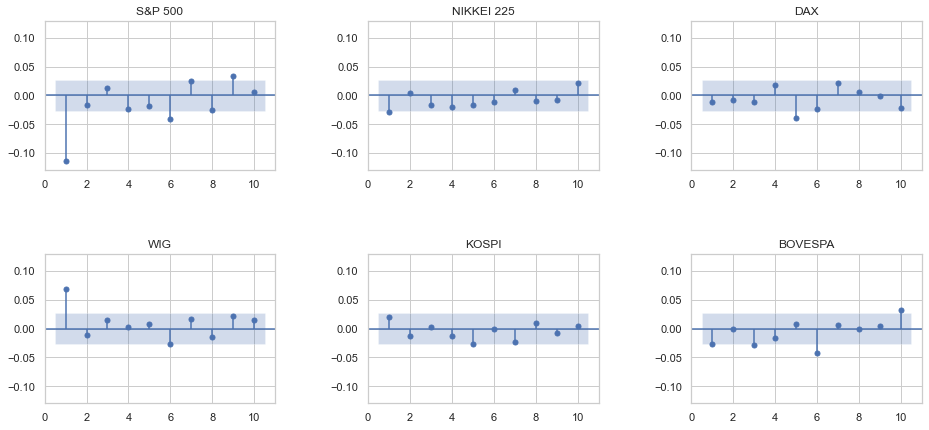

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(13, 6)) #dać z zerem jednak bo ujednolicają się osie i są bardziej porównywalne, psamo jest dwustronne 0.025x2
fig.tight_layout(h_pad=5, w_pad=5)

plot_pacf(snp_ret,ax=axes[0, 0],lags=10, zero=False)
axes[0,0].set_title('S&P 500')
axes[0,0].set_ylim(-0.13, 0.13)
plot_pacf(nkx_ret, ax=axes[0, 1],lags=10, zero=False)
axes[0,1].set_title('NIKKEI 225')
axes[0,1].set_ylim(-0.13, 0.13)
plot_pacf(dax_ret, ax=axes[0, 2],lags=10, zero=False)
axes[0,2].set_title('DAX')
axes[0,2].set_ylim(-0.13, 0.13)
plot_pacf(wig_ret, ax=axes[1, 0],lags=10, zero=False)
axes[1,0].set_title('WIG')
axes[1,0].set_ylim(-0.13, 0.13)
# plot_acf(wig20_ret, ax=axes[1, 0],lags=10)
# axes[1,0].set_title('WIG20')
plot_pacf(kospi_ret, ax=axes[1, 1],lags=10, zero=False)
axes[1,1].set_title('KOSPI')
axes[1,1].set_ylim(-0.13, 0.13)
plot_pacf(bvp_ret, ax=axes[1, 2],lags=10, zero=False)
axes[1,2].set_title('BOVESPA')
axes[1,2].set_ylim(-0.13, 0.13)
# plot_acf(mrv_ret, ax=axes[1, 3],lags=10)
# axes[1,3].set_title('MERVAL')

(-0.13, 0.55)

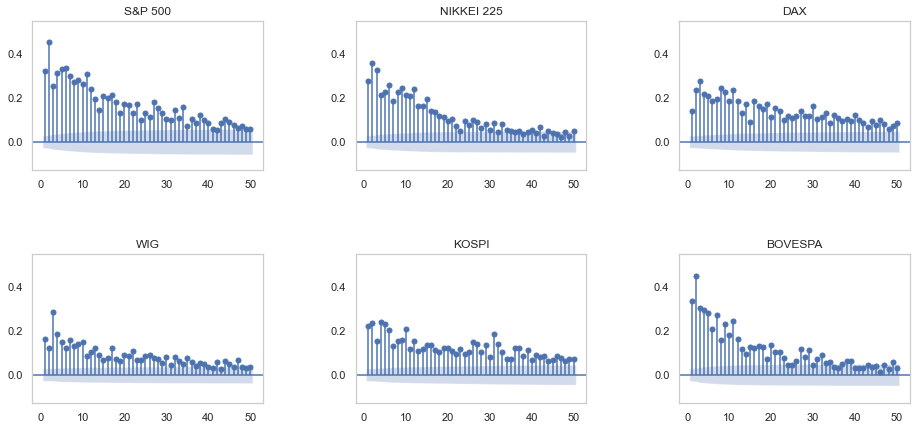

In [14]:

####ACF DLA KWADRATÓW
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axes = plt.subplots(2, 3, figsize=(13, 6)) #dać z zerem jednak bo ujednolicają się osie i są bardziej porównywalne, psamo jest dwustronne 0.025x2
fig.tight_layout(h_pad=5, w_pad=5)

plot_acf(snp_ret_sq,ax=axes[0, 0],lags=50, zero=False)
axes[0,0].set_title('S&P 500')
axes[0,0].set_ylim(-0.13, 0.55)
plot_acf(nkx_ret_sq, ax=axes[0, 1],lags=50, zero=False)
axes[0,1].set_title('NIKKEI 225')
axes[0,1].set_ylim(-0.13, 0.55)
plot_acf(dax_ret_sq, ax=axes[0, 2],lags=50, zero=False)
axes[0,2].set_title('DAX')
axes[0,2].set_ylim(-0.13, 0.55)
plot_acf(wig_ret_sq, ax=axes[1, 0],lags=50, zero=False)
axes[1,0].set_title('WIG')
axes[1,0].set_ylim(-0.13, 0.55)
# plot_acf(wig20_ret, ax=axes[1, 0],lags=10)
# axes[1,0].set_title('WIG20')
plot_acf(kospi_ret_sq, ax=axes[1, 1],lags=50, zero=False)
axes[1,1].set_title('KOSPI')
axes[1,1].set_ylim(-0.13, 0.55)
plot_acf(bvp_ret_sq, ax=axes[1, 2],lags=50, zero=False)
axes[1,2].set_title('BOVESPA')
axes[1,2].set_ylim(-0.13, 0.55)
# plot_acf(mrv_ret, ax=axes[1, 3],lags=10)
# axes[1,3].set_title('MERVAL')

c:\Users\et\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\et\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\et\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\et\miniconda3\lib\site-packages\statsmodels\graph

(-0.13, 0.55)

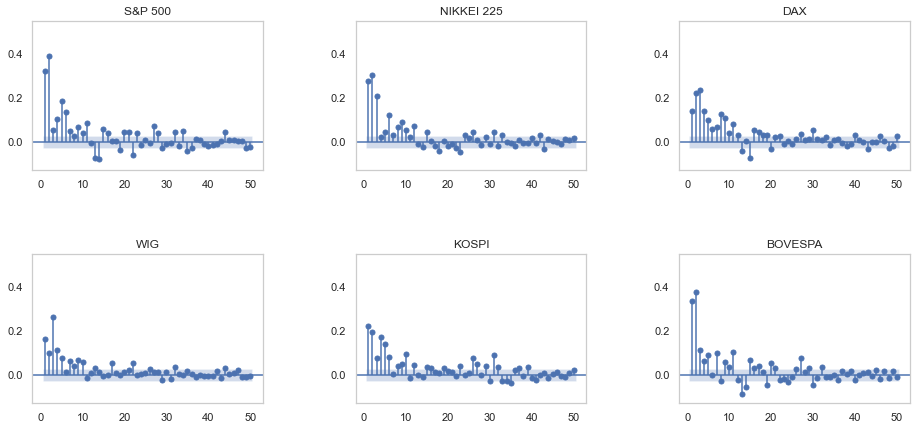

In [15]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(2, 3, figsize=(13, 6)) #dać z zerem jednak bo ujednolicają się osie i są bardziej porównywalne, psamo jest dwustronne 0.025x2
fig.tight_layout(h_pad=5, w_pad=5)

plot_pacf(snp_ret_sq,ax=axes[0, 0],lags=50, zero=False)
axes[0,0].set_title('S&P 500')
axes[0,0].set_ylim(-0.13, 0.55)
plot_pacf(nkx_ret_sq, ax=axes[0, 1],lags=50, zero=False)
axes[0,1].set_title('NIKKEI 225')
axes[0,1].set_ylim(-0.13, 0.55)
plot_pacf(dax_ret_sq, ax=axes[0, 2],lags=50, zero=False)
axes[0,2].set_title('DAX')
axes[0,2].set_ylim(-0.13, 0.55)
plot_pacf(wig_ret_sq, ax=axes[1, 0],lags=50, zero=False)
axes[1,0].set_title('WIG')
axes[1,0].set_ylim(-0.13, 0.55)
# plot_acf(wig20_ret, ax=axes[1, 0],lags=10)
# axes[1,0].set_title('WIG20')
plot_pacf(kospi_ret_sq, ax=axes[1, 1],lags=50, zero=False)
axes[1,1].set_title('KOSPI')
axes[1,1].set_ylim(-0.13, 0.55)
plot_pacf(bvp_ret_sq, ax=axes[1, 2],lags=50, zero=False)
axes[1,2].set_title('BOVESPA')
axes[1,2].set_ylim(-0.13, 0.55)
# plot_acf(mrv_ret, ax=axes[1, 3],lags=10)
# axes[1,3].set_title('MERVAL')

(-0.13, 0.55)

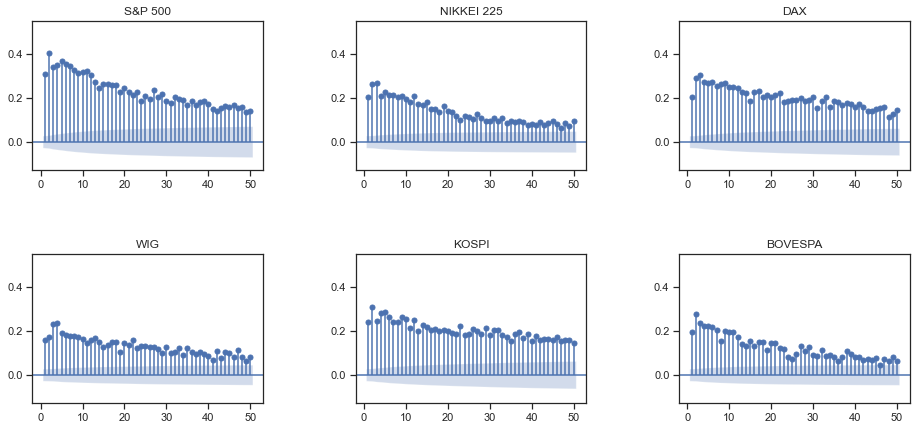

In [92]:

####ACF DLA ABS

fig, axes = plt.subplots(2, 3, figsize=(13, 6)) #dać z zerem jednak bo ujednolicają się osie i są bardziej porównywalne, psamo jest dwustronne 0.025x2
fig.tight_layout(h_pad=5, w_pad=5)

plot_acf(abs(snp_ret),ax=axes[0, 0],lags=50, zero=False)
axes[0,0].set_title('S&P 500')
axes[0,0].set_ylim(-0.13, 0.55)
plot_acf(abs(nkx_ret), ax=axes[0, 1],lags=50, zero=False)
axes[0,1].set_title('NIKKEI 225')
axes[0,1].set_ylim(-0.13, 0.55)
plot_acf(abs(dax_ret), ax=axes[0, 2],lags=50, zero=False)
axes[0,2].set_title('DAX')
axes[0,2].set_ylim(-0.13, 0.55)
plot_acf(abs(wig_ret), ax=axes[1, 0],lags=50, zero=False)
axes[1,0].set_title('WIG')
axes[1,0].set_ylim(-0.13, 0.55)
# plot_acf(wig20_ret, ax=axes[1, 0],lags=10)
# axes[1,0].set_title('WIG20')
plot_acf(abs(kospi_ret), ax=axes[1, 1],lags=50, zero=False)
axes[1,1].set_title('KOSPI')
axes[1,1].set_ylim(-0.13, 0.55)
plot_acf(abs(bvp_ret), ax=axes[1, 2],lags=50, zero=False)
axes[1,2].set_title('BOVESPA')
axes[1,2].set_ylim(-0.13, 0.55)
# plot_acf(mrv_ret, ax=axes[1, 3],lags=10)
# axes[1,3].set_title('MERVAL')

(-0.13, 0.55)

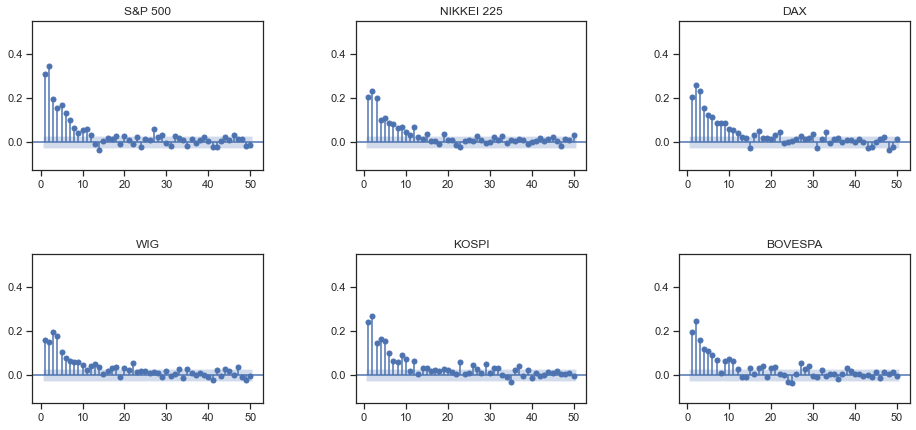

In [96]:
fig, axes = plt.subplots(2, 3, figsize=(13, 6)) #dać z zerem jednak bo ujednolicają się osie i są bardziej porównywalne, psamo jest dwustronne 0.025x2
fig.tight_layout(h_pad=5, w_pad=5)

plot_pacf(abs(snp_ret),ax=axes[0, 0],lags=50, zero=False)
axes[0,0].set_title('S&P 500')
axes[0,0].set_ylim(-0.13, 0.55)
plot_pacf(abs(nkx_ret), ax=axes[0, 1],lags=50, zero=False)
axes[0,1].set_title('NIKKEI 225')
axes[0,1].set_ylim(-0.13, 0.55)
plot_pacf(abs(dax_ret), ax=axes[0, 2],lags=50, zero=False)
axes[0,2].set_title('DAX')
axes[0,2].set_ylim(-0.13, 0.55)
plot_pacf(abs(wig_ret), ax=axes[1, 0],lags=50, zero=False)
axes[1,0].set_title('WIG')
axes[1,0].set_ylim(-0.13, 0.55)
# plot_acf(wig20_ret, ax=axes[1, 0],lags=10)
# axes[1,0].set_title('WIG20')
plot_pacf(abs(kospi_ret), ax=axes[1, 1],lags=50, zero=False)
axes[1,1].set_title('KOSPI')
axes[1,1].set_ylim(-0.13, 0.55)
plot_pacf(abs(bvp_ret), ax=axes[1, 2],lags=50, zero=False)
axes[1,2].set_title('BOVESPA')
axes[1,2].set_ylim(-0.13, 0.55)
# plot_acf(mrv_ret, ax=axes[1, 3],lags=10)
# axes[1,3].set_title('MERVAL')

In [101]:
snp_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_snp.feather')
snp_gkyz = snp_vol["vGKYZ_252"]
nkx_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_nkx.feather')
nkx_gkyz = nkx_vol["vGKYZ_252"]
dax_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_dax.feather')
dax_gkyz = dax_vol["vGKYZ_252"]
wig_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_wig.feather')
wig_gkyz = wig_vol["vGKYZ_252"]
kospi_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_kospi.feather')
kospi_gkyz = kospi_vol["vGKYZ_252"]
bvp_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_bvp.feather')
bvp_gkyz = bvp_vol["vGKYZ_252"]

(-0.13, 1.0)

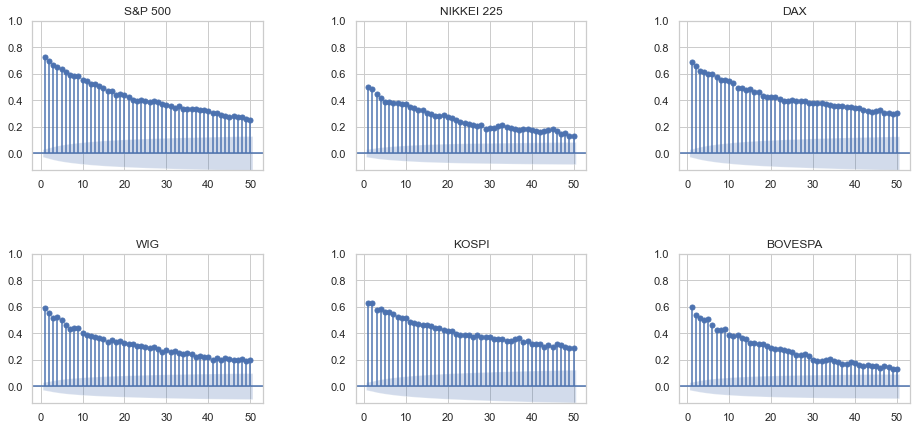

In [103]:
####ACF DLA GKYZ

fig, axes = plt.subplots(2, 3, figsize=(13, 6)) #dać z zerem jednak bo ujednolicają się osie i są bardziej porównywalne, psamo jest dwustronne 0.025x2
fig.tight_layout(h_pad=5, w_pad=5)

plot_acf(abs(snp_gkyz),ax=axes[0, 0],lags=50, zero=False)
axes[0,0].set_title('S&P 500')
axes[0,0].set_ylim(-0.13, 1)
plot_acf(abs(nkx_gkyz), ax=axes[0, 1],lags=50, zero=False)
axes[0,1].set_title('NIKKEI 225')
axes[0,1].set_ylim(-0.13, 1)
plot_acf(abs(dax_gkyz), ax=axes[0, 2],lags=50, zero=False)
axes[0,2].set_title('DAX')
axes[0,2].set_ylim(-0.13, 1)
plot_acf(abs(wig_gkyz), ax=axes[1, 0],lags=50, zero=False)
axes[1,0].set_title('WIG')
axes[1,0].set_ylim(-0.13, 1)
# plot_acf(wig20_ret, ax=axes[1, 0],lags=10)
# axes[1,0].set_title('WIG20')
plot_acf(abs(kospi_gkyz), ax=axes[1, 1],lags=50, zero=False)
axes[1,1].set_title('KOSPI')
axes[1,1].set_ylim(-0.13, 1)
plot_acf(abs(bvp_gkyz), ax=axes[1, 2],lags=50, zero=False)
axes[1,2].set_title('BOVESPA')
axes[1,2].set_ylim(-0.13, 1)
# plot_acf(mrv_ret, ax=axes[1, 3],lags=10)
# axes[1,3].set_title('MERVAL')

(-0.13, 1.0)

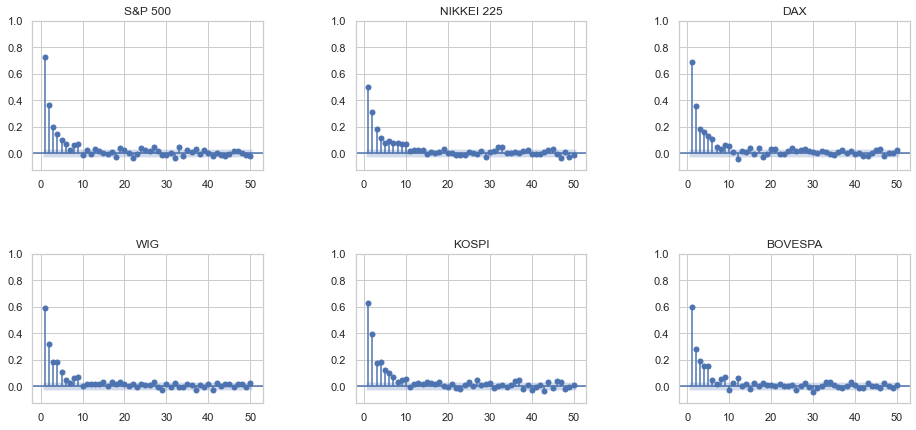

In [104]:
fig, axes = plt.subplots(2, 3, figsize=(13, 6)) #dać z zerem jednak bo ujednolicają się osie i są bardziej porównywalne, psamo jest dwustronne 0.025x2
fig.tight_layout(h_pad=5, w_pad=5)

plot_pacf(abs(snp_gkyz),ax=axes[0, 0],lags=50, zero=False)
axes[0,0].set_title('S&P 500')
axes[0,0].set_ylim(-0.13, 1)
plot_pacf(abs(nkx_gkyz), ax=axes[0, 1],lags=50, zero=False)
axes[0,1].set_title('NIKKEI 225')
axes[0,1].set_ylim(-0.13, 1)
plot_pacf(abs(dax_gkyz), ax=axes[0, 2],lags=50, zero=False)
axes[0,2].set_title('DAX')
axes[0,2].set_ylim(-0.13, 1)
plot_pacf(abs(wig_gkyz), ax=axes[1, 0],lags=50, zero=False)
axes[1,0].set_title('WIG')
axes[1,0].set_ylim(-0.13, 1)
# plot_acf(wig20_ret, ax=axes[1, 0],lags=10)
# axes[1,0].set_title('WIG20')
plot_pacf(abs(kospi_gkyz), ax=axes[1, 1],lags=50, zero=False)
axes[1,1].set_title('KOSPI')
axes[1,1].set_ylim(-0.13, 1)
plot_pacf(abs(bvp_gkyz), ax=axes[1, 2],lags=50, zero=False)
axes[1,2].set_title('BOVESPA')
axes[1,2].set_ylim(-0.13, 1)
# plot_acf(mrv_ret, ax=axes[1, 3],lags=10)
# axes[1,3].set_title('MERVAL')

In [60]:
#statystki opisowe śednia, ochylenie, min max itp, skośność i kurtoza
print(snp_ret.describe())
print(snp_ret.skew())
print(snp_ret.kurtosis())


count    5283.000000
mean        0.017948
std         1.255387
min       -12.765214
25%        -0.475235
50%         0.059345
75%         0.581615
max        10.957196
dtype: float64
-0.39315086851954917
10.946274002910409


In [26]:
#korelacje między wykresami

In [79]:
cols = [snp_ret, nkx_ret, dax_ret, wig_ret, kospi_ret, bvp_ret]
dt_rets = pd.concat(cols, axis=1)
dt_rets.columns=['SNP','NKX', 'DAX', 'WIG', 'KOSPI', 'BOVESPA']

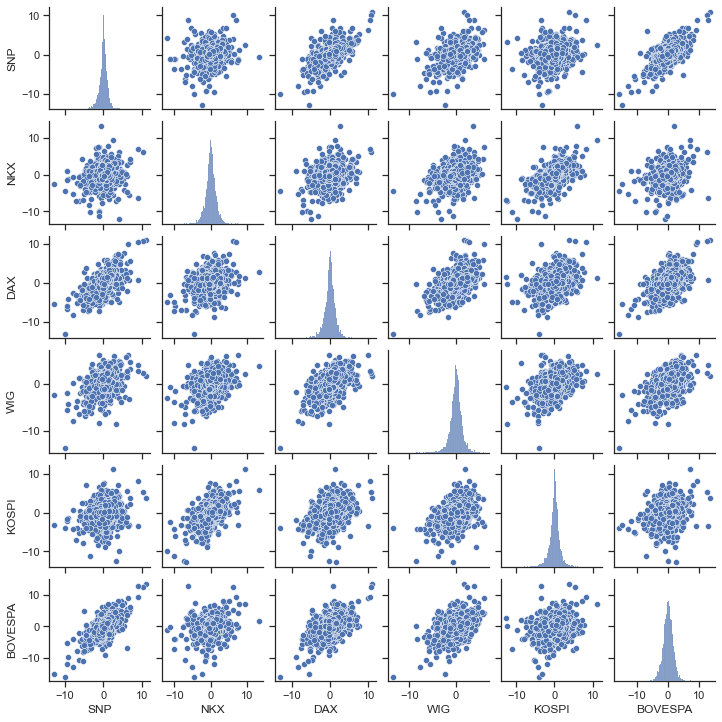

In [58]:


sns.set_theme(style="ticks")

sns.pairplot(dt_rets, height=1.7)

In [80]:
dt_rets.corr()

,SNP,NKX,DAX,WIG,KOSPI,BOVESPA
SNP,1.000000,0.149052,0.613771,0.374888,0.182874,0.618622
NKX,0.149052,1.000000,0.282663,0.309990,0.578712,0.164343
DAX,0.613771,0.282663,1.000000,0.534369,0.310823,0.470806
WIG,0.374888,0.309990,0.534369,1.000000,0.359217,0.367519
KOSPI,0.182874,0.578712,0.310823,0.359217,1.000000,0.212590
BOVESPA,0.618622,0.164343,0.470806,0.367519,0.212590,1.000000


In [25]:
#DODAĆ QQ PLOT

In [26]:
#pd.plotting.scatter_matrix(dt_rets, figsize=(8,8),alpha = 0.2, hist_kwds={'bins':100})

In [29]:
#check if data is stationary
from statsmodels.tsa.stattools import adfuller
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [30]:
adf_check(snp_ret)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -13.461648528007569
p-value : 3.5203750727896514e-25
#Lags Used : 33
Number of Observations Used : 5249
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [81]:
#ARIMA
dt = snp_ret

In [83]:
dt

Date
2000-01-04   -3.909923
2000-01-05    0.192038
2000-01-06    0.095525
2000-01-07    2.672994
2000-01-10    1.112782
                ...   
2020-12-24    0.353034
2020-12-28    0.868469
2020-12-29   -0.222985
2020-12-30    0.134065
2020-12-31    0.641820
Length: 5283, dtype: float64

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
#można też ręcznie https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/



#auto arma order select
res = sm.tsa.arma_order_select_ic(dt, max_ar=4, max_ma=2, ic=["aic", "bic"], trend="n")



In [76]:
#print(res)
print(res.aic_min_order)
print(res.bic_min_order)

(2, 1)
(0, 1)


In [77]:
res

{'aic':               0             1             2
 0  17397.758043  17330.588336  17332.584472
 1  17331.751936  17332.585461  17334.534456
 2  17332.353948  17329.268425  17330.791689
 3  17333.405194  17330.897882  17333.266527
 4  17332.768874  17331.168406  17331.662618,
 'bic':               0             1             2
 0  17404.330293  17343.732834  17352.301221
 1  17344.896435  17352.302209  17360.823453
 2  17352.070696  17355.557423  17363.652936
 3  17359.694192  17363.759129  17372.700023
 4  17365.630121  17370.601902  17377.668364,
 'aic_min_order': (2, 1),
 'bic_min_order': (0, 1)}

In [78]:
#sample fit
model = ARIMA(dt[0:4200],order=(0,0,0))
results = model.fit()

In [80]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4200
Model:                          ARIMA   Log Likelihood               10873.297
Date:                Mon, 27 Dec 2021   AIC                         -21742.595
Time:                        16:45:10   BIC                         -21729.909
Sample:                             0   HQIC                        -21738.109
                               - 4200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.013      0.311      -0.000       0.001
sigma2         0.0003   4.34e-06     76.179      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):              2198.10
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
len(dt)

5196